# Pyber Data Analysis

## Part 1: Bubble Plot

In [109]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn

seaborn.set()
seaborn.set_palette(seaborn.xkcd_palette([
    "gold",
    "light sky blue",
    "coral",
]))
seaborn.set_style({"axes.facecolor": "darkgray"})

In [110]:
fare_data = pd.read_csv("ride_data.csv")
fare_data.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [111]:
city_data = pd.read_csv("city_data.csv")
city_data.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [112]:
avg_fare_per_city = fare_data.groupby("city").mean()
avg_city_fare_typed = avg_fare_per_city.join(city_data.set_index("city"))
avg_city_fare_typed.head()

,fare,ride_id,driver_count,type
city,,,,
Alvarezhaven,23.928710,5.351586e+12,21,Urban
Alyssaberg,20.609615,3.536678e+12,67,Urban
Anitamouth,37.315556,4.195870e+12,16,Suburban
Antoniomouth,23.625000,5.086800e+12,21,Urban
Aprilchester,21.981579,4.574788e+12,49,Urban


In [113]:
total_rides_per_city = fare_data["city"].value_counts()
total_rides_per_city.head()

Port Johnstad    34
Swansonbury      34
Port James       32
South Louis      32
Arnoldview       31
Name: city, dtype: int64

In [114]:
city_summary = avg_city_fare_typed.join(total_rides_per_city)
city_summary = city_summary.drop("ride_id", axis=1)
city_summary.columns = ["avg_fare", "driver_count", "type", "ride_count"]
city_summary.head()

,avg_fare,driver_count,type,ride_count
Alvarezhaven,23.928710,21,Urban,31
Alyssaberg,20.609615,67,Urban,26
Anitamouth,37.315556,16,Suburban,9
Antoniomouth,23.625000,21,Urban,22
Aprilchester,21.981579,49,Urban,19


In [115]:
urban_cities = city_summary[city_summary.type == "Urban"]
suburban_cities = city_summary[city_summary.type == "Suburban"]
rural_cities = city_summary[city_summary.type == "Rural"]

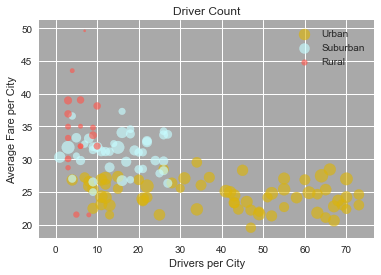

In [116]:
for df in [urban_cities, suburban_cities, rural_cities]:
    plt.scatter(
        df["driver_count"],
        df["avg_fare"],
        s=df["ride_count"]*5,
        alpha=0.65,
        label=df.iloc[0]["type"]
    )
plt.xlabel("Drivers per City")
plt.ylabel("Average Fare per City")
plt.title("Driver Count")
plt.legend()
plt.show()

## Part 2: Pie Charts

### Fares by City Type

In [117]:
typed_fares = fare_data.join(city_data[["city", "type"]].set_index("city"), on="city", rsuffix="right")
typed_fares.sample(10)

,city,date,fare,ride_id,type
1675,New Brandonborough,2016-04-26 19:15:18,27.95,7273596757686,Suburban
695,Smithhaven,2016-10-12 05:55:43,4.57,8478436402439,Urban
1793,Martinmouth,2016-09-13 05:50:40,39.92,155794037869,Suburban
1429,Eriktown,2016-11-10 08:31:17,39.15,4715353076775,Urban
1804,Port Alexandria,2016-05-11 17:15:14,38.47,7189369952182,Suburban
1973,Port Alexandria,2016-08-10 12:16:09,31.75,11622863980,Suburban
2221,Lake Brenda,2016-07-26 22:43:47,21.61,906508038494,Suburban
166,Lake Jeffreyland,2016-04-10 15:48:48,38.54,7589586454429,Urban
585,Lake Sarashire,2016-08-01 09:48:56,25.32,1733794141848,Urban
722,New David,2016-08-09 11:20:33,44.44,6236880541676,Urban


In [118]:
fare_per_type = typed_fares.groupby("type").sum()["fare"]
total_fares = sum(typed_fares["fare"])
percent_fare_per_type = fare_per_type / total_fares
percent_fare_per_type

type
Rural       0.065798
Suburban    0.314458
Urban       0.619745
Name: fare, dtype: float64

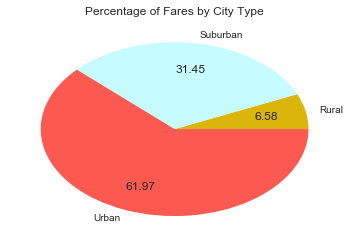

In [119]:
fare_pie = plt.pie(
    percent_fare_per_type,
    labels=percent_fare_per_type.index,
    autopct='%.2f',
    pctdistance=0.7
)
plt.title("Percentage of Fares by City Type")
plt.show()

### Rides by City Type

In [120]:
rides_per_type = city_summary.groupby("type").sum()["ride_count"]
total_rides = sum(city_summary["ride_count"])
percent_rides_per_type = rides_per_type / total_rides
percent_rides_per_type

type
Rural       0.051932
Suburban    0.272954
Urban       0.675114
Name: ride_count, dtype: float64

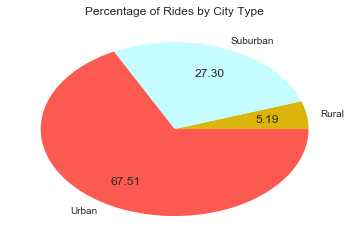

In [121]:
ride_pie = plt.pie(
    percent_rides_per_type,
    labels=percent_rides_per_type.index,
    autopct='%.2f',
    pctdistance=0.7
)
plt.title("Percentage of Rides by City Type")
plt.show()

### Drivers by City Type

In [122]:
drivers_per_type = city_data.groupby("type").sum()["driver_count"]
total_drivers = sum(city_data["driver_count"])
percent_drivers_per_type = drivers_per_type / total_drivers
percent_drivers_per_type

type
Rural       0.031054
Suburban    0.190505
Urban       0.778441
Name: driver_count, dtype: float64

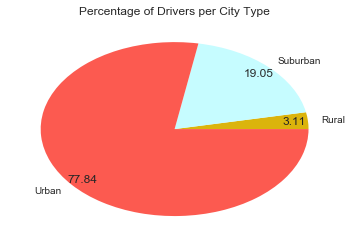

In [123]:
driver_pie = plt.pie(
    percent_drivers_per_type,
    labels=percent_drivers_per_type.index,
    autopct='%.2f',
    pctdistance=0.9
)
plt.title("Percentage of Drivers per City Type")
plt.show()

## Conclusions

A few trends were noticed.  While more than 75% of the drivers are in urban settings, closer to 60% of the total fares were received in urban settings.  Combining this observation with that of the bubble plot above, it appears that ride fares in suburban and rural settings are generally higher than those in urban settings.

This could be because the distance to travel is greater in the suburban and rural areas (speculation), but it also appears that those areas have much fewer drivers, driving the scarcity and thus, presumably, the price up.